# Will New Drivers Start Driving?

## 2.1 Group Members: Jeremy Schrader

The sample dataset is a cohort of driver signups for Uber in January 2016.  The data is from a few months after they signed up to include the result of whether they actually completed their first trip as a driver. It also includes several pieces of background information gather about the driver and their car.

## 2.2 Problem Formulation

### 2.2.1 Data Problem
The question to be answered is what factors are best at predicting whether a signup will start to drive.  Basically, to build a model that weights these factors most strongly so as to most effectively predict whether a new driver, based on their factors, will start to drive.

### 2.2.2 Data Population
The data population is all individuals who sign up to be Uber drivers.  The sample is all individuals who signed up in the month of January 2016.

After looking through the data for the city_name field, I see that only 3 cities are represented in the data. Therefore, the scope of the data is only a subset of Uber's overall driver signups, maybe all signups from those 3 cities.

## 2.3 Data

### 2.3.1 Kaggle account
N/A as my project is not from kaggle(but my kaggle username is jeremyschrader1)

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 2.3.2 Show First 5 lines
The first 5 lines are show in the next block.

There is only one data file. The data dictionary is provided below.  The headers are included in the data file.  We can see from the data dictionary that we have different kinds of data:
- data about the driver, e.g. city_id
- data about the signup process, e.g. signup_os
- data about the driver's car, e.g. vehicle_make

The target variable is first-trip-date.  Basically, did this person who signed up actually ever start as an uber driver.

```
id: driver_id
city_id: city_id this user signed up in
signup_os: signup device of the user (“android”, “ios”, “website”, “other”)
signup_channel: what channel did the driver sign up from (“offline”, “paid”, “organic”, “referral”)
signup_timestamp: timestamp of account creation; local time in the form ‘YYYY MM DD’
bgc_date: date of background check consent; in the form ‘YYYY MM DD’
vehicle_added_date: date when driver’s vehicle information was uploaded; in the form ‘YYYY MM DD’
first_trip_date: date of the first trip as a driver; in the form ‘YYYY MM DD’
vehicle_make: make of vehicle uploaded (i.e. Honda, Ford, Kia)
vehicle_model: model of vehicle uploaded (i.e. Accord, Prius, 350z)
vehicle_year: year that the car was made; in the form ‘YYYY’
```

In [2]:
with open('./data/ds_challenge_v2_1_data.csv', 'r') as file:
    # Read the first five lines
    for _ in range(5):
        line = file.readline()
        if not line:
            break
        print(line.strip()) 

id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
1,Strark,ios web,Paid,1/2/16,NA,NA,,,NA,NA
2,Strark,windows,Paid,1/21/16,NA,NA,,,NA,NA
3,Wrouver,windows,Organic,1/11/16,1/11/16,NA,,,NA,NA
4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016,2/3/16


## Data Wrangling

Structure
Granularity
Scope
Time
Faithfulness

In [5]:
df = pd.read_csv('./data/ds_challenge_v2_1_data.csv')
df.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


Notes: 
- Structure is correct.  Csv import worked correctly and filenames worked.  
  - One column name(city_id -> city_name) is different from the data dictionary
  - Date formats are provided incorrectly in the data dictionary. 
- Granularity is at the level of the individual who signed up, as expected

In [11]:
# change the text-formatted data to real dates
import pandas as pd
df['dt_signup_date'] = pd.to_datetime(df['signup_date'], format="%m/%d/%y")
df['dt_bgc_date'] = pd.to_datetime(df['bgc_date'], format="%m/%d/%y")
df['dt_vehicle_added_date'] = pd.to_datetime(df['vehicle_added_date'], format="%m/%d/%y")
df.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,dt_signup_date,dt_bgc_date,dt_vehicle_added_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02,NaT,NaT
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-21,NaT,NaT
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN,2016-01-11,2016-01-11,NaT
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16,2016-01-29,2016-02-03,2016-02-03
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN,2016-01-10,2016-01-25,2016-01-26


In [15]:
max, min = df['dt_signup_date'].max(), df['dt_signup_date'].min()
print(min, max)

2016-01-01 00:00:00 2016-01-30 00:00:00


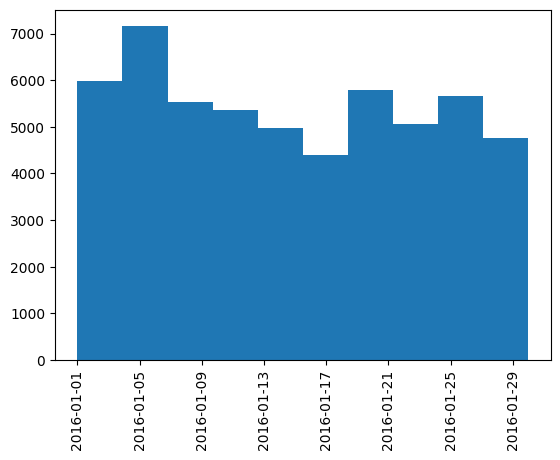

In [16]:
plt.hist(x=df['dt_signup_date'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [18]:
df['id'].count()

54681

Notes: 
- Scope and Time: The data is for each day of january 2016(except jan 31).  And, it is essentially regularly distributed across these days.  Therefore, the time of the data is as expected.  The scope of the data is partially based on the time.  There are 54681 rows.  I looked up an estimate for number of people who signed up to drive with uber and did not find anything.  From a look at the city_name field, I see that only 3 cities are represented in the data. Therefore, the scope of the data is only a subset of Uber's overall driver signups, maybe all from those 3 cities.

### Notes: 
For Faithfulness, I will go through each variable, one-by-one and explore what it should be and whether it is faithful this.

In [19]:
# View a list of variables and a count of their non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     54681 non-null  int64         
 1   city_name              54681 non-null  object        
 2   signup_os              47824 non-null  object        
 3   signup_channel         54681 non-null  object        
 4   signup_date            54681 non-null  object        
 5   bgc_date               32896 non-null  object        
 6   vehicle_added_date     13134 non-null  object        
 7   vehicle_make           13223 non-null  object        
 8   vehicle_model          13223 non-null  object        
 9   vehicle_year           13223 non-null  float64       
 10  first_completed_date   6137 non-null   object        
 11  dt_signup_date         54681 non-null  datetime64[ns]
 12  dt_bgc_date            32896 non-null  datetime64[ns]
 13  d

In [20]:
# city_name
df['city_name'].value_counts()

city_name
Strark     29557
Berton     20117
Wrouver     5007
Name: count, dtype: int64

### Notes
From the breakdown of the city_name field, I can see that the scope of the data is not "All" of uber sign-ups but only those for a few cities.  I'll adjust my statements on the data scope above.

Otherwise, city_name field looks OK.

In [21]:
df['signup_os'].value_counts()

signup_os
ios web        16632
android web    14944
windows         6776
mac             5824
other           3648
Name: count, dtype: int64

### Notes
The signup_os field looks reasonable.  

7000 missing values.  Because this is a nominal categorical variable, we can probably handle these by adding another category called 'missing'.

In [22]:
df['signup_channel'].value_counts()

signup_channel
Paid        23938
Referral    17316
Organic     13427
Name: count, dtype: int64

### Notes
This looks reasonable.  I don't know exactly what they stand for, e.g. 'Paid' or 'Organic'.  Also, there is one category, 'offline', that doesn't exist in the data

No missing values.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     54681 non-null  int64         
 1   city_name              54681 non-null  object        
 2   signup_os              47824 non-null  object        
 3   signup_channel         54681 non-null  object        
 4   signup_date            54681 non-null  object        
 5   bgc_date               32896 non-null  object        
 6   vehicle_added_date     13134 non-null  object        
 7   vehicle_make           13223 non-null  object        
 8   vehicle_model          13223 non-null  object        
 9   vehicle_year           13223 non-null  float64       
 10  first_completed_date   6137 non-null   object        
 11  dt_signup_date         54681 non-null  datetime64[ns]
 12  dt_bgc_date            32896 non-null  datetime64[ns]
 13  d